In [1]:
import functools
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import palettable
import sys
import pneumodel.plotting as plotting
import pneumodel.trial as trial
reload(plotting)
reload(trial)

/Users/ocsicnarf/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


<module 'pneumodel.trial' from 'pneumodel/trial.pyc'>

##  Setup

In [168]:
palettable.cubehelix.cubehelix1_16_r.mpl_colors

[(1.0, 1.0, 1.0),
 (0.9019607843137255, 0.9607843137254902, 0.8470588235294118),
 (0.7568627450980392, 0.9411764705882353, 0.7490196078431373),
 (0.6, 0.9137254901960784, 0.7254901960784313),
 (0.47058823529411764, 0.8588235294117647, 0.7607843137254902),
 (0.396078431372549, 0.7725490196078432, 0.8274509803921568),
 (0.38823529411764707, 0.6509803921568628, 0.8862745098039215),
 (0.43529411764705883, 0.5137254901960784, 0.8901960784313725),
 (0.5058823529411764, 0.3764705882352941, 0.8235294117647058),
 (0.5647058823529412, 0.25882352941176473, 0.6862745098039216),
 (0.5764705882352941, 0.17647058823529413, 0.49411764705882355),
 (0.5215686274509804, 0.12941176470588237, 0.29411764705882354),
 (0.40784313725490196, 0.10588235294117647, 0.12549019607843137),
 (0.2549019607843137, 0.09019607843137255, 0.01568627450980392),
 (0.10588235294117647, 0.058823529411764705, 0.0),
 (0.0, 0.0, 0.0)]

In [311]:
%matplotlib inline
cubehelix = palettable.cubehelix.cubehelix1_16_r.mpl_colors
COLORS = {}
COLORS['infant'] = cubehelix[6]
COLORS['toddler'] = cubehelix[10]

In [3]:
OUTPUT_FOLDER = "/Users/ocsicnarf/Github/Pneumo-Model/outputs/wcv-trial-kenya-e-0.1"
FIGURES_FOLDER = os.path.join(OUTPUT_FOLDER, 'figures')
save_figure = functools.partial(plotting.save_figure, folder=FIGURES_FOLDER, dpi=300)

In [4]:
%%time
NUM_TRIALS = 5
TRIALS = [trial.Trial(OUTPUT_FOLDER, i) for i in range(NUM_TRIALS)]

CPU times: user 9.31 s, sys: 2.11 s, total: 11.4 s
Wall time: 12.3 s


In [5]:
def plot_scatter_and_mean(ax, xs, ys, color='k'):
  for x, y in zip(xs, ys):
    ax.plot([x] * len(y), y, c=color, alpha=0.8, marker='o', markersize=5, mew=0, ls='None')
    ax.plot(x, np.mean(y), c=color, marker='_', mew=1, markersize=20)
    print np.mean(y), 

## Analysis

### Age-specific mean duration

For fitting purposes, look at control arms. Pick up age ranges corresponding to http://www.ncbi.nlm.nih.gov/pmc/articles/PMC3433858/figure/JIS447F2/

In [6]:
start_days = np.array([k * (6 * 30) for k in range(1, 10)])

43.4825334693 38.6875757816 34.0935629459 29.5285489027 25.9906812199 23.4652985973 21.723573835 20.2408210137 19.3605483425

['/Users/ocsicnarf/Github/Pneumo-Model/outputs/wcv-trial-kenya-e-0.1/figures/age-specific-mean-duration-3.pdf',
 '/Users/ocsicnarf/Github/Pneumo-Model/outputs/wcv-trial-kenya-e-0.1/figures/age-specific-mean-duration-3.png']

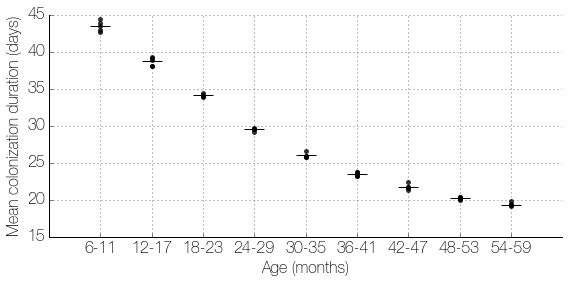

In [10]:
arm_name = 'control-infant'
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
xs = start_days / 30
ys = [trial.evaluate_across_runs(trial.get_mean_duration, TRIALS, 'control-infant', 6 * 30, first_day=d) for d in start_days]

plot_scatter_and_mean(ax, xs, ys)
#ax.boxplot(ys, **plotting.get_boxplot_style('k'))

ax.set_ylabel('Mean colonization duration (days)')
ax.yaxis.set_major_locator(mpl.ticker.MultipleLocator(5))

ax.set_xlabel('Age (months)')
ax.set_xticks(xs)
ax.set_xticklabels(['{:.0f}-{:.0f}'.format(x, x + 5) for x in xs])

ax.grid()
plotting.remove_spines(ax)
fig.tight_layout()
save_figure(fig, 'age-specific-mean-duration')

### Age-specific Prevalence

In [8]:
%%time
months_old = range(25)
fup_days = [k * 30 for k in months_old]
arm_name = 'control-infant'
ctrl_arm_config = TRIALS[0].arms[arm_name].config
ctrl_traj = trial.evaluate_across_runs(trial.get_prevalence_trajectory, TRIALS, arm_name, fup_days, first_day=0)

CPU times: user 1min 49s, sys: 1.17 s, total: 1min 50s
Wall time: 1min 50s


0.0 0.52876 0.7302 0.82164 0.866 0.88588 0.89544 0.8986 0.90084 0.90116 0.89512 0.88556 0.87616 0.88016 0.88228 0.87708 0.87156 0.86004 0.8476 0.8364 0.81608 0.79704 0.7788 0.75912 0.7376

['/Users/ocsicnarf/Github/Pneumo-Model/outputs/wcv-trial-kenya-e-0.1/figures/age-specific-prevalence-15.pdf',
 '/Users/ocsicnarf/Github/Pneumo-Model/outputs/wcv-trial-kenya-e-0.1/figures/age-specific-prevalence-15.png']

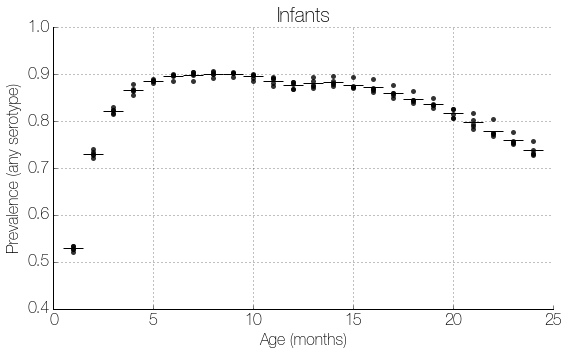

In [12]:
fig, ax = plt.subplots(1, 1, figsize=(8, 5))

# prevalence in control infants
ys = ctrl_traj.T
xs = months_old

plot_scatter_and_mean(ax, xs, ys)

#ax.boxplot(ys, positions=xs, **plotting.get_boxplot_style('k'))

ax.set_title('Infants')

ax.set_ylabel('Prevalence (any serotype)')
ax.set_ylim(0.4, 1.0)

ax.set_xlabel('Age (months)')
#ax.set_xticks(months_old)
#ax.set_xticklabels(['{:.0f}'.format(d / 30) for d in days_old])

plotting.remove_spines(ax) 
ax.grid(True)

fig.tight_layout()
save_figure(fig, 'age-specific-prevalence')

##  Look at vaccine arms

####  Look at prevalence, measured at different times (days from date of last vaccine dose)

Generate the data first, takes a bit of time (~2-3 minutes)

In [13]:
%%time
trajectories = {}
fup_days = np.array([k * 30 for k in range(25)])
arm_names = TRIALS[0].arms.keys()
for name in arm_names:
  trajectories[name] = trial.evaluate_across_runs(trial.get_prevalence_trajectory, TRIALS, name, fup_days)
  sys.stdout.write('.')
  sys.stdout.flush()
sys.stdout.write('\n')

...........
CPU times: user 23min 31s, sys: 19.9 s, total: 23min 51s
Wall time: 24min 44s


In [31]:
trajectories['control-infant'].shape

(5, 25)

0.7302 0.82164 0.866 0.88588 0.89544 0.8986 0.90084 0.90116 0.89512 0.88556 0.87616 0.88016 0.88228 0.87708 0.87156 0.86004 0.8476 0.8364 0.81608 0.79704 0.7788 0.75912 0.7376 0.71528 0.69896 0.72984 0.80756 0.83452 0.8384 0.83548 0.82348 0.80612 0.79228 0.76688 0.74712 0.72568 0.73812 0.73676 0.72336 0.70288 0.68464 0.6668 0.65092 0.62964 0.61284 0.5984 0.5848 0.56956 0.55228 0.54768 0.72772 0.79764 0.8078 0.80056 0.7808 0.7586 0.73188 0.6998 0.67156 0.64604 0.62212 0.64128 0.64236 0.6312 0.61416 0.59852 0.58592 0.56688 0.54596 0.53884 0.52992 0.523 0.50384 0.48944 0.48368 0.72612 0.7756 0.75436 0.71916 0.6744 0.63604 0.6002 0.56908 0.5386 0.5124 0.49144 0.5232 0.52148 0.51508 0.5024 0.49268 0.47404 0.47072 0.45936 0.45724 0.44936 0.44648 0.43548 0.43176 0.42992

['/Users/ocsicnarf/Github/Pneumo-Model/outputs/wcv-trial-kenya-e-0.1/figures/prevalence-over-time-by-ce-infant-6.pdf',
 '/Users/ocsicnarf/Github/Pneumo-Model/outputs/wcv-trial-kenya-e-0.1/figures/prevalence-over-time-by-ce-infant-6.png']

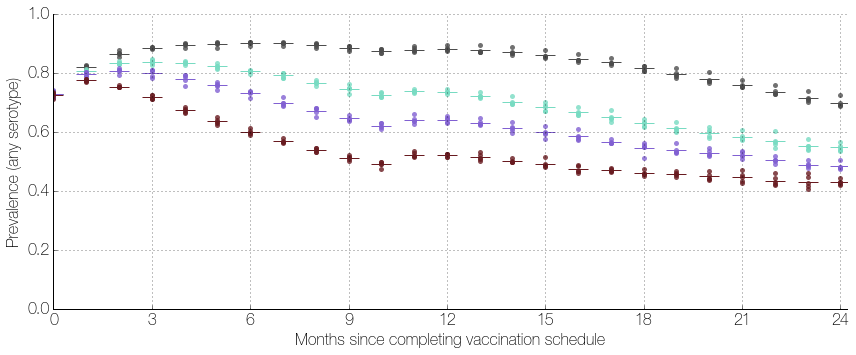

In [170]:
fig, ax = plt.subplots(1, 1, figsize=(12, 5))

age_group = 'infant'
arm_names = [s.format(age_group) for s in ['control-{}', 'dr-3ce-{}', 'dr-5ce-{}', 'dr-10ce-{}']]

for i, name in enumerate(arm_names):
  xs = fup_days / 30
  ys = trajectories[name].T
  
  plot_scatter_and_mean(ax, xs, ys, COLORS[i])

  ax.set_ylabel('Prevalence (any serotype)')
  ax.set_ylim(0, 1)
  
  ax.set_xlabel('Months since completing vaccination schedule')
  ax.set_xlim(0, 24.2)
  ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(3))

  plotting.remove_spines(ax) 
  ax.grid(True)
  ax.legend(frameon=True, loc='best', fontsize=12)
  
fig.tight_layout()
save_figure(fig, 'prevalence-over-time-by-ce-{}'.format(age_group))

In [45]:
from scipy.spatial import ConvexHull

In [55]:
np.array([xs, ys]).shape

(2, 5)

In [56]:
hull.

In [67]:
hull.vertices

array([1, 2, 3], dtype=int32)

### Figure 1 Version A

['/Users/ocsicnarf/Github/Pneumo-Model/outputs/wcv-trial-kenya-e-0.1/figures/control-infant-versus-dr-3ce-infant-dr-5ce-infant-dr-10ce-infant-6.pdf',
 '/Users/ocsicnarf/Github/Pneumo-Model/outputs/wcv-trial-kenya-e-0.1/figures/control-infant-versus-dr-3ce-infant-dr-5ce-infant-dr-10ce-infant-6.png']

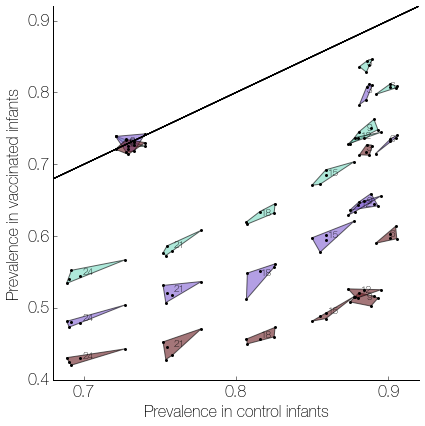

In [180]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6))

age_group = 'infant'
arm_x = 'control-{}'.format(age_group)
arm_y1 = 'dr-3ce-{}'.format(age_group)
arm_y2 = 'dr-5ce-{}'.format(age_group)
arm_y3 = 'dr-10ce-{}'.format(age_group)
hatches = ['ooo', '***', '...'] 

#limits = (0.4, 1)
num_time_points = trajectories[arm_x].shape[1]

for i in range(num_time_points):
  if i % 3 != 0:
    continue
  
  xs = trajectories[arm_x][:,i]
  for j, arm_y in enumerate((arm_y1, arm_y2, arm_y3)):
    ys = trajectories[arm_y][:,i]

    points = np.array([xs, ys]).T

    hull = ConvexHull(points)
    ax.fill(points[hull.vertices, 0], points[hull.vertices, 1], 'k', 
            lw=1, ec='k', fc=COLORS[j + 1], alpha=0.6, 
            capstyle='round', joinstyle='round')
#    ax.fill(points[hull.vertices, 0], points[hull.vertices, 1], hatch=hatches[j])
    ax.plot(xs, ys, ls='None', marker='o', markersize=3)
    ax.annotate(str(i), (np.mean(xs), np.mean(ys)), fontsize=10)

  ax.set_xlabel('Prevalence in control {}s'.format(age_group))
  ax.set_xlim(0.68, 0.92)
  ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(0.1))
  
  ax.set_ylabel('Prevalence in vaccinated {}s'.format(age_group))
  ax.set_ylim(0.4, 0.92)
  ax.yaxis.set_major_locator(mpl.ticker.MultipleLocator(0.1))
  
  ax.plot([0.4, 0.92], [0.4, 0.92], lw=1)
  
plotting.remove_spines(ax)
fig.tight_layout()
save_figure(fig, '{}-versus-{}'.format(arm_x, '-'.join(arm_ys)))

### Figure 1 Version B

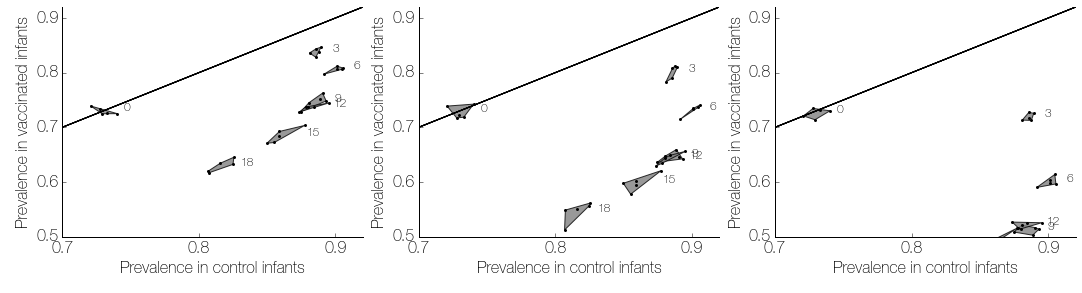

In [312]:
age_group = 'infant'
arm_x = 'control-{}'.format(age_group)
arm_ys = [s.format(age_group) for s in ('dr-3ce-{}', 'dr-5ce-{}', 'dr-10ce-{}')]

fig, axes = plt.subplots(1, len(arm_ys), figsize=(5 * len(arm_ys), 4))

xlim = [0.7, 0.92]
ylim = [0.5, 0.92]

num_time_points = 19#trajectories[arm_x].shape[1]
for ax, arm_y in zip(axes, arm_ys):
  for i in range(num_time_points):
    if i % 3 != 0:
      continue

    xs = trajectories[arm_x][:,i]
    ys = trajectories[arm_y][:,i]
    points = np.array([xs, ys]).T

    hull = ConvexHull(points)
    ax.fill(points[hull.vertices, 0], points[hull.vertices, 1], 'k', 
            lw=1, ec='k', fc='.5', alpha=0.8, 
            capstyle='round', joinstyle='round')
    ax.plot(xs, ys, ls='None', marker='o', markersize=3)
    ax.annotate(str(i), ((np.mean(xs) + np.max(xs)) / 2 + 0.01, np.mean(ys)), fontsize=12)

    ax.set_xlabel('Prevalence in control {}s'.format(age_group))
    ax.set_xlim(*xlim)
    ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(0.1))

    ax.set_ylabel('Prevalence in vaccinated {}s'.format(age_group))
    ax.set_ylim(*ylim)
    ax.yaxis.set_major_locator(mpl.ticker.MultipleLocator(0.1))

    lower = max(xlim[0], ylim[0])
    upper = max(xlim[1], ylim[1])
    ax.plot((lower, upper), (lower, upper), lw=1, ls='-')

  plotting.remove_spines(ax)
fig.tight_layout()
#save_figure(fig, '{}-versus-{}-multipanels'.format(arm_x, '-'.join(arm_ys)))

### Figure 1 Version C

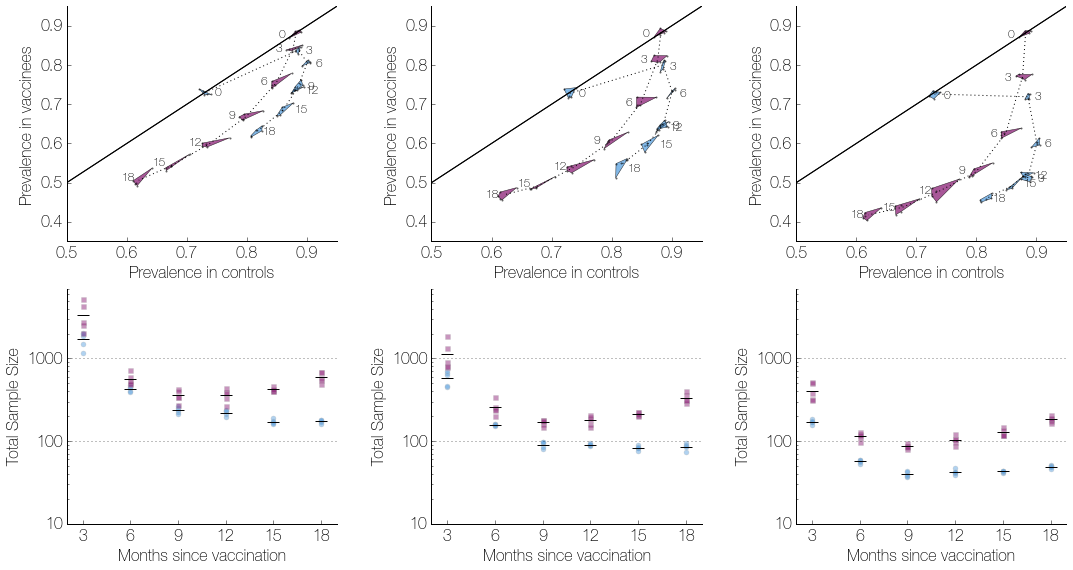

In [331]:
arm_prefixes = ('dr-3ce-{}', 'dr-5ce-{}', 'dr-10ce-{}')
age_groups = ['infant', 'toddler']
num_time_points = 19#trajectories[arm_x].shape[1]
fig, all_axes = plt.subplots(2, len(arm_prefixes), figsize=(5 * len(arm_prefixes), 8))

#########################################
# Plot prevalence in two arms over time #
#########################################
xlim = [0.5, 0.95]
ylim = [0.35, 0.95]
axes = all_axes[0]

for k, age_group in enumerate(age_groups):
  arm_x = 'control-{}'.format(age_group)
  arm_ys = [s.format(age_group) for s in arm_prefixes]

  for ax, arm_y in zip(axes, arm_ys):
    for i in range(num_time_points):
      if i % 3 != 0:
        continue

      xs = trajectories[arm_x][:,i]
      ys = trajectories[arm_y][:,i]
      points = np.array([xs, ys]).T

      hull = ConvexHull(points)
      ax.fill(points[hull.vertices, 0], points[hull.vertices, 1], 'k', 
              lw=0.5, ec='k', fc=COLORS[age_group], alpha=0.8, 
              capstyle='round', joinstyle='round')
      ax.plot(xs, ys, ls='None', marker='o', markersize=2, alpha=0.6)

      offset = 0.015
      if k == 0:
        text_x = np.max(xs) * (1 + offset)
      else:
        text_x = np.min(xs) * (1 - offset)
      text_y = (np.min(ys) + np.max(ys)) / 2
      ax.annotate(str(i), (text_x, text_y), fontsize=12, ha='center', va='center')
  
    # Link the shapes
    mean_x = trajectories[arm_x][:,:num_time_points:3].mean(axis=0)
    mean_y = trajectories[arm_y][:,:num_time_points:3].mean(axis=0)
    ax.plot(mean_x, mean_y, ls=':')
    
    
    # label axes, etc.
    ax.set_xlabel('Prevalence in controls')
    ax.set_xlim(*xlim)
    ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(0.1))

    ax.set_ylabel('Prevalence in vaccinees')
    ax.set_ylim(*ylim)
    ax.yaxis.set_major_locator(mpl.ticker.MultipleLocator(0.1))

    lower = max(xlim[0], ylim[0])
    upper = max(xlim[1], ylim[1])
    ax.plot((lower, upper), (lower, upper), lw=1, ls='-')
    plotting.remove_spines(ax)


##############################
# Plot sample size over time #
##############################
axes = all_axes[1]
for k, age_group in enumerate(age_groups):
  arm_x = 'control-{}'.format(age_group)
  arm_ys = [s.format(age_group) for s in arm_prefixes]

  for ax, arm_y in zip(axes, arm_ys):
    for i in range(num_time_points):
      if i % 3 != 0:
        continue

      if i == 0:
        pass
        
      xs = trajectories[arm_x][:,i]
      ys = trajectories[arm_y][:,i]
      
      zs = [trial.sample_size(x, y) for (x, y) in zip(xs, ys)]
      m = 'o' if k == 0 else 's'
      ax.plot([i] * len(zs), zs, 
              marker=m, color=COLORS[age_group], markersize=5, alpha=0.5, mec='.7', mew=0.5,
              ls='none')
      ax.plot(i, np.mean(zs), c='k', marker='_', mew=1, markersize=12)
      
      
      ax.set_xlabel('Months since vaccination')
      ax.set_xlim(2, num_time_points)
      ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(3))

      ax.set_ylabel('Total Sample Size')
      ax.yaxis.grid(True, which='major')
      ax.set_ylim(1e1, 7e3)
      ax.set_yscale('log')
      ax.yaxis.set_major_formatter(mpl.ticker.ScalarFormatter())


    plotting.remove_spines(ax)
    
fig.tight_layout()
plt.subplots_adjust(hspace=0.2, wspace=0.35)
#save_figure(fig, 'prevalence-sample-size-multipanels-{}'.format('-'.join(age_groups)))

#### Sample size

['/Users/ocsicnarf/Github/Pneumo-Model/outputs/wcv-trial-kenya-e-0.1-beta-0.1/figures/trial-0/DR-vs-sample-size-over-time-0.pdf',
 '/Users/ocsicnarf/Github/Pneumo-Model/outputs/wcv-trial-kenya-e-0.1-beta-0.1/figures/trial-0/DR-vs-sample-size-over-time-0.png']

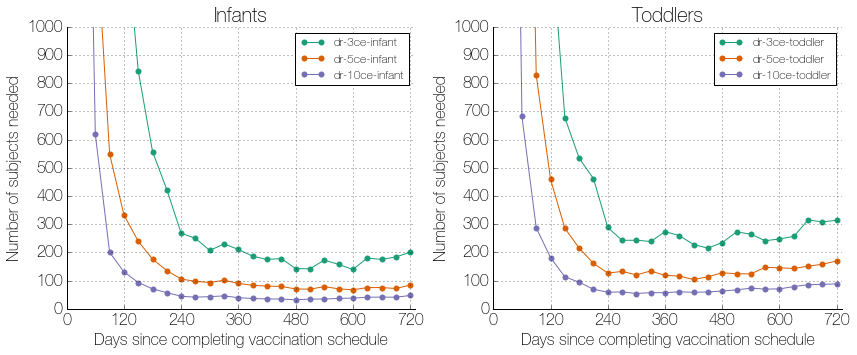

In [293]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# sample size in infants
control_traj = trajectories['control-infant']
arm_names = ('dr-3ce-infant', 'dr-5ce-infant', 'dr-10ce-infant')
ax = axes[0]
for i, name in enumerate(arm_names):
  xs = fup_days
  ys = sample_size(control_traj, trajectories[name])
  
  ax.plot(xs, ys, color=COLORS[i + 1], marker='o', label=name)
  ax.set_title('Infants')
  ax.set_ylim(0, 1000)
  ax.set_ylabel('Number of subjects needed')
  ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(120))
  ax.yaxis.set_major_locator(mpl.ticker.MaxNLocator(10))
  ax.set_xlim(0, max(xs) + 10)
  ax.set_xlabel('Days since completing vaccination schedule')

  remove_spines(ax) 
  ax.grid(True)
  ax.legend(frameon=True, loc='best', fontsize=12)
  
# sample size in toddlers
control_traj = trajectories['control-toddler']
arm_names = ('dr-3ce-toddler', 'dr-5ce-toddler', 'dr-10ce-toddler')
ax = axes[1]
for i, name in enumerate(arm_names):
  xs = fup_days
  ys = sample_size(control_traj, trajectories[name])
  
  ax.plot(xs, ys, color=COLORS[i + 1], marker='o', label=name)
  ax.set_title('Toddlers')
  ax.set_ylim(0, axes[0].get_ylim()[1])
  #ax.set_ylim(1e1, 1e5)
  ax.set_ylabel('Number of subjects needed')
  #ax.set_yscale('log')
  ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(120))
  ax.yaxis.set_major_locator(mpl.ticker.MaxNLocator(10))
  ax.set_xlim(0, max(xs) + 10)
  ax.set_xlabel('Days since completing vaccination schedule')

  remove_spines(ax) 
  ax.grid(True)
  ax.legend(frameon=True, loc='best', fontsize=12)

fig.tight_layout()
save_fig(fig, 'DR-vs-sample-size-over-time')

### Look again at SR vaccines, in terms of prevalence

['/Users/ocsicnarf/Github/Pneumo-Model/outputs/wcv-trial-kenya-e-0.1-beta-0.1/figures/trial-0/DR+SR-vs-prevalence-over-time-1.pdf',
 '/Users/ocsicnarf/Github/Pneumo-Model/outputs/wcv-trial-kenya-e-0.1-beta-0.1/figures/trial-0/DR+SR-vs-prevalence-over-time-1.png']

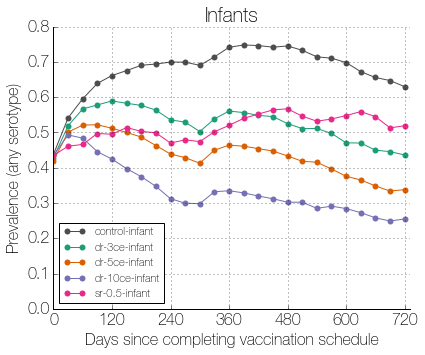

In [295]:
fig, axes = plt.subplots(1, 1, figsize=(6, 5))

# prevalence in infants
arm_names = ('control-infant', 'dr-3ce-infant', 'dr-5ce-infant', 'dr-10ce-infant', 'sr-0.5-infant')
ax = axes
for i, name in enumerate(arm_names):
  xs = fup_days
  ys = trajectories[name]
  
  ax.plot(xs, ys, color=COLORS[i], marker='o', label=name)
  ax.set_title('Infants')
  ax.set_ylim(0, 0.8)
  ax.set_ylabel('Prevalence (any serotype)')
  ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(120))
  ax.set_xlim(0, max(xs) + 10)
  ax.set_xlabel('Days since completing vaccination schedule')

  remove_spines(ax) 
  ax.grid(True)
  ax.legend(frameon=True, loc='best', fontsize=11)
  
fig.tight_layout()
save_fig(fig, 'DR+SR-vs-prevalence-over-time')